<a href="https://colab.research.google.com/github/honeylouluzon/K-Means-Clustering-in-Python/blob/main/Happiness_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STD_SATISFACTION: STD=0.315116977518399 , Mid=2.13


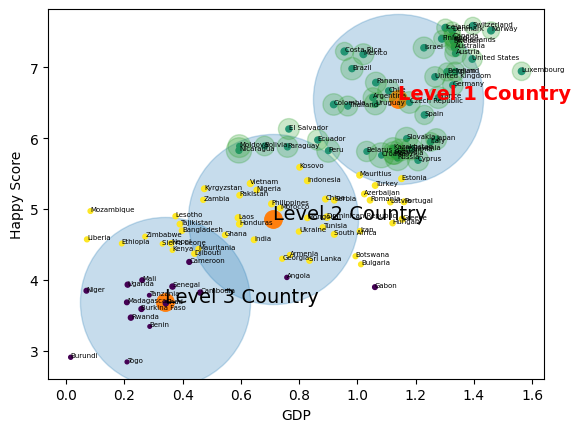

In [1]:
from typing import FrozenSet
import matplotlib. pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/LIFELONG LEARNING/Data Science/happyscore_income.csv')
happy = data[ 'happyScore']
std_satisfaction = data['std_satisfaction']
adjusted_satisfaction = data['adjusted_satisfaction']
GDP = data['GDP']
plt.xlabel ('GDP')
plt.ylabel ('Happy Score')
for k, row in data.iterrows ():
  plt.text(row['GDP'],row['happyScore'],row['country'], fontsize=5)

income_happy = np.column_stack((GDP, happy))
mid_std_satisfy = np.median(std_satisfaction)
std_std_satisfy = np.std(std_satisfaction)

km_res = KMeans (n_clusters=3).fit(income_happy)
clusters = km_res.cluster_centers_
labels = km_res.labels_
plt.scatter(clusters[:,0], clusters[:,1], s=15000, alpha=0.25)
plt.scatter(clusters[:,0], clusters[:,1], s=std_std_satisfy*500)
plt.text(clusters[0,0], clusters[0,1], "Level 3 Country", fontsize=14)
plt.text(clusters[1,0], clusters[1,1], "Level 1 Country", fontsize=14, fontweight='bold', color ='r')
plt.text(clusters[2,0], clusters[2,1], "Level 2 Country", fontsize=14)

df = pd.DataFrame(data, columns=['GDP','happyScore', 'std_satisfaction','adjusted_satisfaction'])
df['Cluster'] = labels
df.sort_values(by=['Cluster'], inplace=True)
bestPlace = df[(df['Cluster']==1)]
plt.scatter (GDP, happy, s=adjusted_satisfaction/3, c=labels, cmap='viridis')
plt.scatter (bestPlace['GDP'], bestPlace['happyScore'], s=(bestPlace['std_satisfaction']**2*50)+(bestPlace['adjusted_satisfaction']/3), alpha=0.25)

print(f"STD_SATISFACTION: STD={std_std_satisfy} , Mid={mid_std_satisfy}")

plt.show()

